In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [13]:
sns.set_theme()
pd.set_option('display.max_columns', None)
PATH_TO_MBD = './MBD/'

In [14]:
dialogs = pd.read_parquet(path=os.path.join(PATH_TO_MBD, 'detail/dialog/fold=0'))

In [15]:
print(dialogs.shape)
dialogs.head()

(43561, 3)


,client_id,event_time,embedding
0,5226901c78c655767ac2a075e6edca6b410624f0c9d2fd...,2021-06-18 05:49:23.962741,"[0.39314136, -0.0361106, 0.31113446, -0.197847..."
1,5226901c78c655767ac2a075e6edca6b410624f0c9d2fd...,2022-06-29 07:39:31.618769,"[0.30220613, -0.38150322, 0.47271872, -0.28499..."
2,5226901c78c655767ac2a075e6edca6b410624f0c9d2fd...,2022-06-24 06:06:59.691367,"[0.5709108, -0.39508772, 0.54685795, -0.413398..."
3,5226901c78c655767ac2a075e6edca6b410624f0c9d2fd...,2021-05-12 12:34:32.616245,"[0.23272727, -0.28448686, 0.5841493, -0.524621..."
4,5226901c78c655767ac2a075e6edca6b410624f0c9d2fd...,2021-10-25 05:25:17.810891,"[0.31696838, -0.14973284, 0.42603743, -0.39549..."


[]

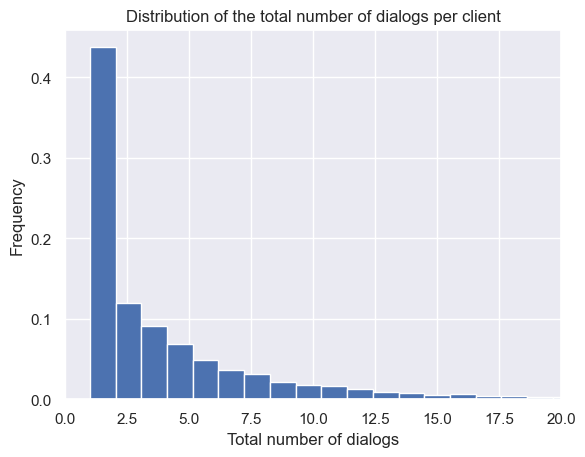

In [16]:
ax = plt.subplot()
ax.set_title('Distribution of the total number of dialogs per client')
ax.set_xlabel('Total number of dialogs')
ax.set_ylabel('Frequency')
ax.set_xlim(0, 20)
dialogs.groupby('client_id')['event_time'].count().hist(bins=80, density=True, ax=ax)
ax.plot()

In [17]:
dialogs.groupby('client_id')['event_time'].count().describe()

count    9401.000000
mean        4.633656
std         5.527459
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        84.000000
Name: event_time, dtype: float64

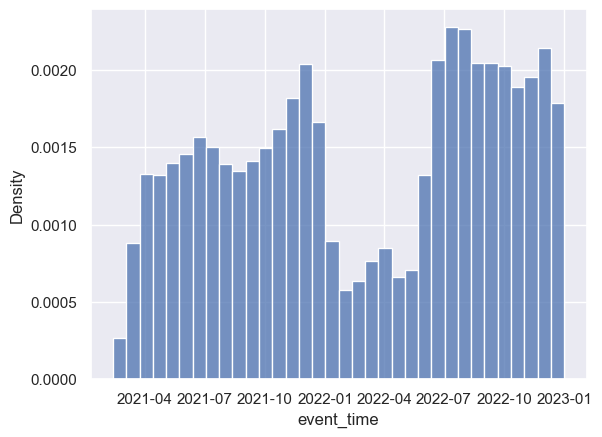

In [18]:
ax = plt.subplot()
sns.histplot(
    ax=ax, 
    data=dialogs, 
    x='event_time', 
    stat='density', 
    # bins=100, 
)
plt.show()

Notice a huge dip in the number of events (customer calls to technical support and negotiations between the
client and its manager) during the first quarter of both years.

In [19]:
dialogs['month'] = dialogs['event_time'].dt.month
dialogs['day_of_month'] = dialogs['event_time'].dt.day
dialogs['day_of_week'] = dialogs['event_time'].dt.day_of_week
dialogs['hour'] = dialogs['event_time'].dt.hour

<Axes: xlabel='event_time'>

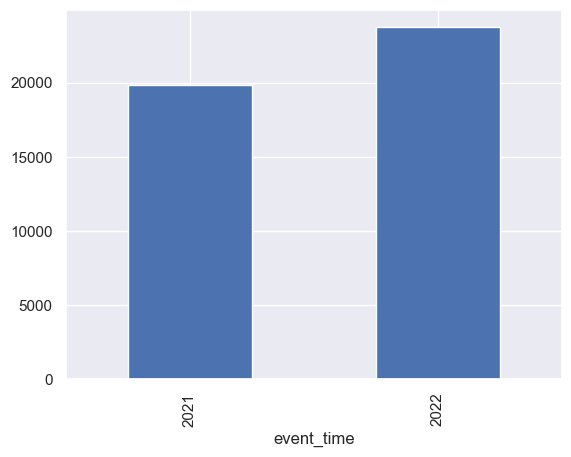

In [20]:
dialogs.groupby(dialogs['event_time'].dt.year)['event_time'].count().plot(kind='bar')

<Axes: xlabel='event_time'>

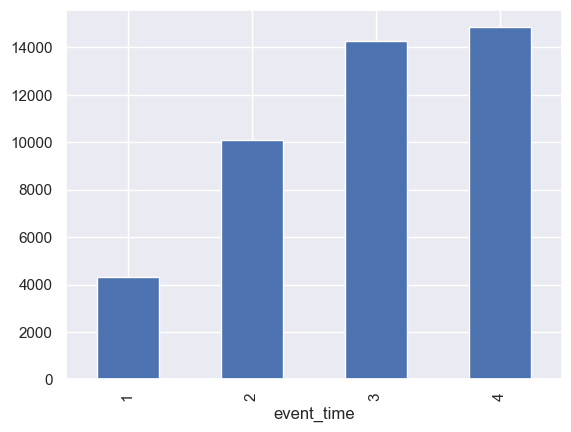

In [21]:
dialogs.groupby(dialogs['event_time'].dt.quarter)['event_time'].count().plot(kind='bar')

<Axes: xlabel='month'>

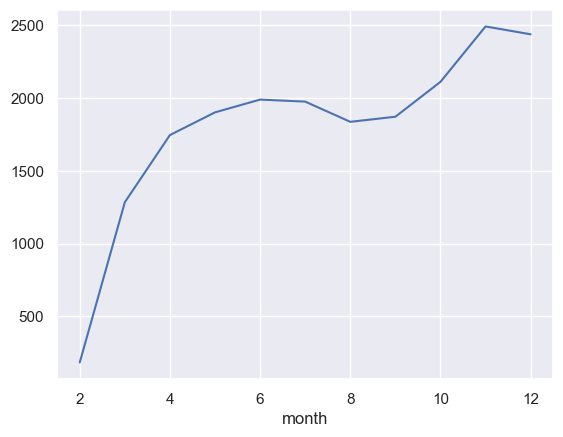

In [22]:
dialogs[dialogs['event_time'].dt.year == 2021].groupby('month')['event_time'].count().plot(kind='line')

<Axes: xlabel='month'>

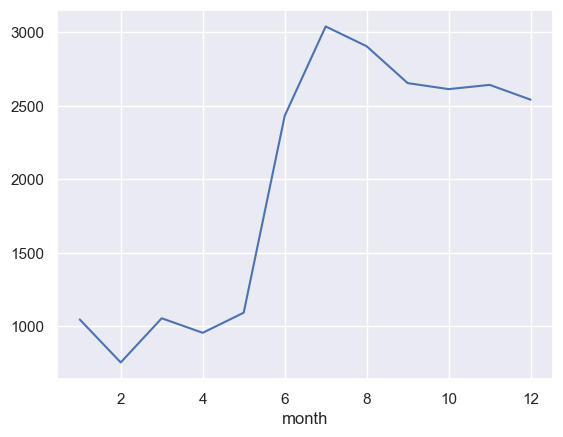

In [23]:
dialogs[dialogs['event_time'].dt.year == 2022].groupby('month')['event_time'].count().plot()

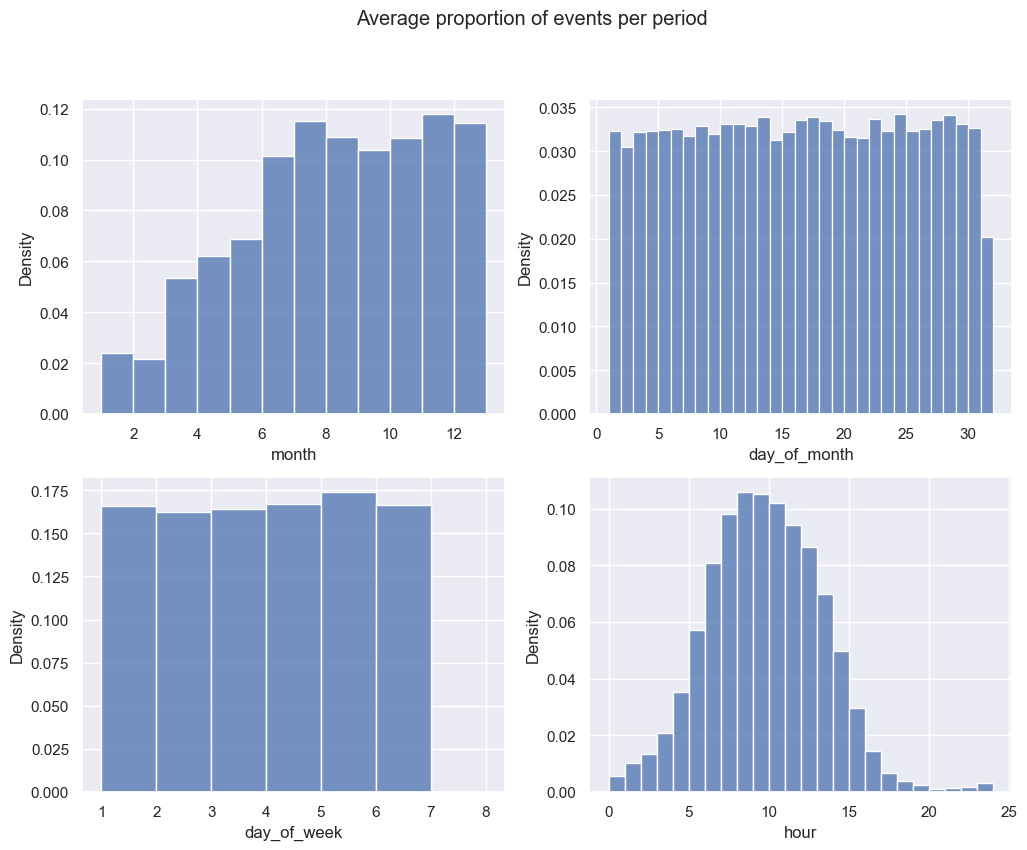

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
fig.suptitle('Average proportion of events per period')
sns.histplot(
    ax=axs[0, 0], 
    data=dialogs, 
    x='month', 
    stat='density', 
    bins=[i + 1 for i in range(12 + 1)], 
)
sns.histplot(
    ax=axs[0, 1], 
    data=dialogs, 
    x='day_of_month', 
    stat='density', 
    bins=[i + 1 for i in range(31 + 1)], 
)
# axs[0, 1].set_xbound(upper=28)
# axs[0, 1].set_xlim(right=28)
sns.histplot(
    ax=axs[1, 0], 
    data=dialogs, 
    x='day_of_week', 
    stat='density', 
    bins=[i + 1 for i in range(7 + 1)], 
)
sns.histplot(
    ax=axs[1, 1], 
    data=dialogs, 
    x='hour', 
    stat='density', 
    bins=[i for i in range(24 + 1)], 
)
plt.show()

In [25]:
days_of_month = dialogs[dialogs['day_of_month'] <= 28]['day_of_month']
days_of_month_normalized = (days_of_month - days_of_month.min()) / (days_of_month.max() - days_of_month.min())

In [26]:
stats.kstest(
    rvs=days_of_month_normalized, 
    cdf=stats.uniform.cdf
)

KstestResult(statistic=0.03734304369663488, pvalue=1.1054937613273598e-48, statistic_location=1.0, statistic_sign=-1)

`pvalue` < 0.05 $\implies$ reject the null hypothesis that the distribution of `day_of_month` is uniform.

In [27]:
days_of_week = dialogs['day_of_week']
days_of_week_normalized = (days_of_week - days_of_week.min()) / (days_of_week.max() - days_of_week.min())

In [28]:
stats.kstest(
    rvs=days_of_week_normalized, 
    cdf=stats.uniform.cdf
)

KstestResult(statistic=0.14317853125502167, pvalue=0.0, statistic_location=1.0, statistic_sign=-1)

`pvalue` < 0.05 $\implies$ reject the null hypothesis that the distribution of `day_of_week` is uniform.

In [29]:
hours = dialogs['hour']
hours_standartized = (hours - hours.mean()) / hours.std(ddof=1)

In [30]:
stats.kstest(
    rvs=hours_standartized, 
    cdf=stats.norm.cdf
)

KstestResult(statistic=0.06427640806911322, pvalue=6.592828120126529e-157, statistic_location=-0.35036492436942757, statistic_sign=1)

`pvalue` < 0.05 $\implies$ reject the null hypothesis that the distribution of `hour` is normal.

In [31]:
print(dialogs.shape)
dialogs.head()

(43561, 7)


,client_id,event_time,embedding,month,day_of_month,day_of_week,hour
0,5226901c78c655767ac2a075e6edca6b410624f0c9d2fd...,2021-06-18 05:49:23.962741,"[0.39314136, -0.0361106, 0.31113446, -0.197847...",6,18,4,5
1,5226901c78c655767ac2a075e6edca6b410624f0c9d2fd...,2022-06-29 07:39:31.618769,"[0.30220613, -0.38150322, 0.47271872, -0.28499...",6,29,2,7
2,5226901c78c655767ac2a075e6edca6b410624f0c9d2fd...,2022-06-24 06:06:59.691367,"[0.5709108, -0.39508772, 0.54685795, -0.413398...",6,24,4,6
3,5226901c78c655767ac2a075e6edca6b410624f0c9d2fd...,2021-05-12 12:34:32.616245,"[0.23272727, -0.28448686, 0.5841493, -0.524621...",5,12,2,12
4,5226901c78c655767ac2a075e6edca6b410624f0c9d2fd...,2021-10-25 05:25:17.810891,"[0.31696838, -0.14973284, 0.42603743, -0.39549...",10,25,0,5


In [32]:
embedding = dialogs['embedding']

length, width = embedding.size, embedding[0].size

new_embedding = np.zeros(shape=(length, width))

for i in range(length):
    new_embedding[i, :] = embedding[i][:]

embedding_columns = [f'embedding_{i + 1}' for i in range(width)]
new_data = {f'embedding_{i + 1}' : new_embedding[:, i] for i in range(width)}
dialogs.drop(columns='embedding', inplace=True)
dialogs = pd.concat([dialogs, pd.DataFrame(new_data)], axis=1)

In [33]:
print(dialogs.shape)
dialogs.head()

(43561, 774)


,client_id,event_time,month,day_of_month,day_of_week,hour,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,embedding_11,embedding_12,embedding_13,embedding_14,embedding_15,embedding_16,embedding_17,embedding_18,embedding_19,embedding_20,embedding_21,embedding_22,embedding_23,embedding_24,embedding_25,embedding_26,embedding_27,embedding_28,embedding_29,embedding_30,embedding_31,embedding_32,embedding_33,embedding_34,embedding_35,embedding_36,embedding_37,embedding_38,embedding_39,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49,embedding_50,embedding_51,embedding_52,embedding_53,embedding_54,embedding_55,embedding_56,embedding_57,embedding_58,embedding_59,embedding_60,embedding_61,embedding_62,embedding_63,embedding_64,embedding_65,embedding_66,embedding_67,embedding_68,embedding_69,embedding_70,embedding_71,embedding_72,embedding_73,embedding_74,embedding_75,embedding_76,embedding_77,embedding_78,embedding_79,embedding_80,embedding_81,embedding_82,embedding_83,embedding_84,embedding_85,embedding_86,embedding_87,embedding_88,embedding_89,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99,embedding_100,embedding_101,embedding_102,embedding_103,embedding_104,embedding_105,embedding_106,embedding_107,embedding_108,embedding_109,embedding_110,embedding_111,embedding_112,embedding_113,embedding_114,embedding_115,embedding_116,embedding_117,embedding_118,embedding_119,embedding_120,embedding_121,embedding_122,embedding_123,embedding_124,embedding_125,embedding_126,embedding_127,embedding_128,embedding_129,embedding_130,embedding_131,embedding_132,embedding_133,embedding_134,embedding_135,embedding_136,embedding_137,embedding_138,embedding_139,embedding_140,embedding_141,embedding_142,embedding_143,embedding_144,embedding_145,embedding_146,embedding_147,embedding_148,embedding_149,embedding_150,embedding_151,embedding_152,embedding_153,embedding_154,embedding_155,embedding_156,embedding_157,embedding_158,embedding_159,embedding_160,embedding_161,embedding_162,embedding_163,embedding_164,embedding_165,embedding_166,embedding_167,embedding_168,embedding_169,embedding_170,embedding_171,embedding_172,embedding_173,embedding_174,embedding_175,embedding_176,embedding_177,embedding_178,embedding_179,embedding_180,embedding_181,embedding_182,embedding_183,embedding_184,embedding_185,embedding_186,embedding_187,embedding_188,embedding_189,embedding_190,embedding_191,embedding_192,embedding_193,embedding_194,embedding_195,embedding_196,embedding_197,embedding_198,embedding_199,embedding_200,embedding_201,embedding_202,embedding_203,embedding_204,embedding_205,embedding_206,embedding_207,embedding_208,embedding_209,embedding_210,embedding_211,embedding_212,embedding_213,embedding_214,embedding_215,embedding_216,embedding_217,embedding_218,embedding_219,embedding_220,embedding_221,embedding_222,embedding_223,embedding_224,embedding_225,embedding_226,embedding_227,embedding_228,embedding_229,embedding_230,embedding_231,embedding_232,embedding_233,embedding_234,embedding_235,embedding_236,embedding_237,embedding_238,embedding_239,embedding_240,embedding_241,embedding_242,embedding_243,embedding_244,embedding_245,embedding_246,embedding_247,embedding_248,embedding_249,embedding_250,embedding_251,embedding_252,embedding_253,embedding_254,embedding_255,embedding_256,embedding_257,embedding_258,embedding_259,embedding_260,embedding_261,embedding_262,embedding_263,embedding_264,embedding_265,embedding_266,embedding_267,embedding_268,embedding_269,embedding_270,embedding_271,embedding_272,embedding_273,embedding_274,embedding_275,embedding_276,embedding_277,embedding_278,embedding_279,embedding_280,embedding_281,embedding_282,embedding_283,embedding_284,embedding_285,embedding_286,embedding_287,embedding_288,embedding_289,embe

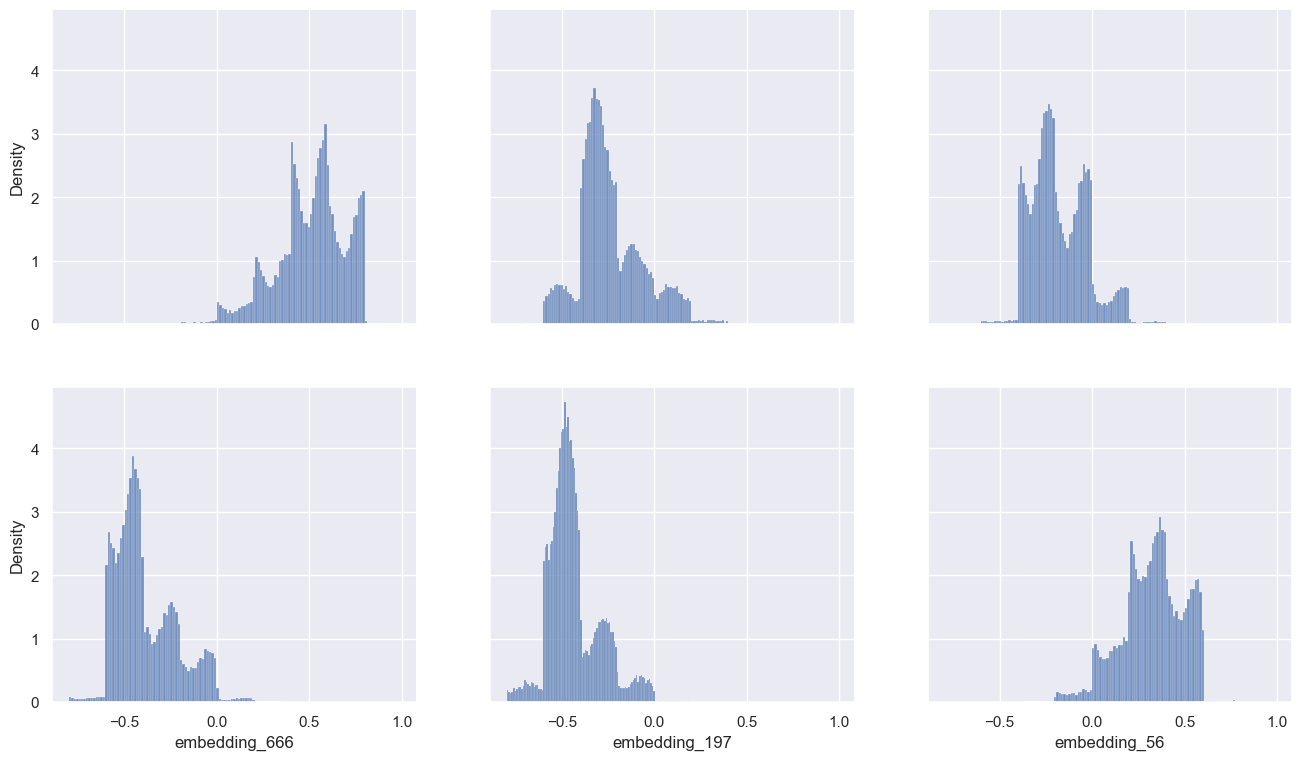

In [37]:
# Draw some random componenets of the embedding vector to inspect the distribution

nrows, ncols = 2, 3

choice = [f'embedding_{i + 1}' for i in np.random.choice(a=np.arange(768), size=nrows * ncols)]
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 9), sharex=True, sharey=True)
for i, embedding_ in enumerate(choice):
    ax = axs[i // ncols, i % ncols]
    sns.histplot(
        data=dialogs, 
        x=embedding_, 
        stat='density', 
        ax=ax, 
    )

In [38]:
dialogs

client_id  \
0      5226901c78c655767ac2a075e6edca6b410624f0c9d2fd...   
1      5226901c78c655767ac2a075e6edca6b410624f0c9d2fd...   
2      5226901c78c655767ac2a075e6edca6b410624f0c9d2fd...   
3      5226901c78c655767ac2a075e6edca6b410624f0c9d2fd...   
4      5226901c78c655767ac2a075e6edca6b410624f0c9d2fd...   
...                                                  ...   
43556  d468ccdd2e2faea76906a2d9c8853471c73317c9b7ae79...   
43557  d468ccdd2e2faea76906a2d9c8853471c73317c9b7ae79...   
43558  d468ccdd2e2faea76906a2d9c8853471c73317c9b7ae79...   
43559  d468ccdd2e2faea76906a2d9c8853471c73317c9b7ae79...   
43560  d468ccdd2e2faea76906a2d9c8853471c73317c9b7ae79...   

                      event_time  month  day_of_month  day_of_week  hour  \
0     2021-06-18 05:49:23.962741      6            18            4     5   
1     2022-06-29 07:39:31.618769      6            29            2     7   
2     2022-06-24 06:06:59.691367      6            24            4     6   
3     2021-05-12 12:34:32.616245      5            12            2    12   
4     2021-10-25 05:25:17.810891     10            25            0     5   
...                          ...    ...           ...          ...   ...   
43556 2022-09-06 08:40:05.942413      9             6            1     8   
43557 2022-08-07 10:23:38.299642      8             7            6    10   
43558 2021-03-21 11:32:09.325457      3            21            6    11   
43559 2021-07-06 06:39:43.740674      7             6            1     6   
43560 2022-08-09 14:19:27.126211      8             9            1    14   

       embedding_1  embedding_2  embedding_3  embedding_4  embedding_5  \
0         0.393141    -0.036111     0.311134    -0.197847    -0.021450   
1         0.302206    -0.381503     0.472719    -0.284991    -0.215715   
2         0.570911    -0.395088     0.546858    -0.413399    -0.256842   
3         0.232727    -0.284487     0.584149    -0.524622    -0.335081   
4         0.316968    -0.149733     0.426037    -0.395491    -0.326017   
...            ...          ...          ...          ...          ...   
43556     0.577912    -0.365684     0.773550    -0.547750    -0.354901   
43557     0.117084    -0.068612     0.312269     0.154168    -0.103369   
43558     0.209844    -0.182707     0.562617    -0.308379    -0.326145   
43559     0.361992    -0.237057     0.556248    -0.259885    -0.338674   
43560     0.237652    -0.188202     0.424701    -0.283115    -0.210937   

       embedding_6  embedding_7  embedding_8  embedding_9  embedding_10  \
0         0.520333     0.146518     0.237431    -0.101610      0.246157   
1         0.453993     0.243807     0.590884    -0.401944      0.558748   
2         0.566686     0.315117     0.429693    -0.483767      0.462113   
3         0.583958     0.206154     0.508602    -0.553970      0.467597   
4         0.417501     0.235124     0.554881    -0.593320      0.553284   
...            ...          ...          ...          ...           ...   
43556     0.631975     0.566187     0.517556    -0.563447      0.519750   
43557     0.292070     0.133218     0.194537    -0.237972      0.394016   
43558     0.530381     0.309376     0.272896    -0.496552      0.252557   
43559     0.560155     0.319117     0.495127    -0.500097      0.464488   
43560     0.445574     0.205257     0.321269    -0.518545      0.519119   

       embedding_11  embedding_12  embedding_13  embedding_14  embedding_15  \
0         -0.378476     -0.284026     -0.488124     -0.237762      0.228043   
1         -0.328704     -0.408575     -0.429224     -0.591857      0.570334   
2         -0.583162     -0.473777     -0.518643     -0.452677      0.417896   
3         -0.466937     -0.537422     -0.566052     -0.499181      0.508554   
4         -0.310054     -0.357848     -0.411544     -0.364478      0.389048   
...             ...           ...           ...           ...           ...   
43556     -0.594060     -0.571564     -0.545888     -0.525686      0.4